In [92]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [93]:
train_df = pd.read_csv('train.csv', encoding='unicode_escape')
train_df

,ï»¿Rk,Player,Debut,Age,Yrs,G,FG%,3P%,FT%,MP,PTS,TRB,AST,Pts Won
0,1.0,Precious Achiuwa,"Dec 23, '20, MIA @ ORL",21.0,3.0,189.0,0.474,0.321,0.605,19.1,7.8,5.3,0.9,0.0
1,2.0,Ty-Shon Alexander,"Dec 27, '20, PHO @ SAC",22.0,1.0,15.0,0.250,0.222,0.500,3.1,0.6,0.7,0.4,0.0
2,3.0,Cole Anthony,"Dec 23, '20, ORL vs. MIA",20.0,3.0,172.0,0.411,0.345,0.861,28.4,14.2,5.0,4.6,0.0
3,4.0,Deni Avdija,"Dec 23, '20, WAS @ PHI",20.0,3.0,212.0,0.431,0.310,0.734,24.8,8.1,5.5,2.1,0.0
4,5.0,Udoka Azubuike,"Dec 23, '20, UTA @ POR",21.0,3.0,68.0,0.769,NaN,0.512,9.0,3.3,3.0,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,560.0,McKinley Wright IV,"Oct 20, '21, MIN vs. HOU",23.0,2.0,32.0,0.475,0.333,0.684,11.1,3.7,1.5,1.9,0.0
560,561.0,Moses Wright,"Dec 22, '21, LAC @ SAC",23.0,1.0,4.0,0.250,0.000,1.000,3.5,1.3,0.8,0.5,0.0
561,562.0,Gabe York,"Apr 9, '22, IND @ PHI",28.0,2.0,5.0,0.357,0.292,0.714,15.4,6.4,1.6,1.8,0.0
562,563.0,Omer Yurtseven,"Oct 21, '21, MIA vs. MIL",23.0,2.0,65.0,0.533,0.222,0.642,12.1,5.2,4.9,0.8,0.0


In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ï»¿Rk    563 non-null    float64
 1   Player   563 non-null    object 
 2   Debut    563 non-null    object 
 3   Age      563 non-null    float64
 4   Yrs      563 non-null    float64
 5   G        563 non-null    float64
 6   FG%      554 non-null    float64
 7   3P%      526 non-null    float64
 8   FT%      507 non-null    float64
 9   MP       563 non-null    float64
 10  PTS      563 non-null    float64
 11  TRB      563 non-null    float64
 12  AST      563 non-null    float64
 13  Pts Won  563 non-null    float64
dtypes: float64(12), object(2)
memory usage: 61.8+ KB


In [95]:
train_df.fillna(0, inplace=True)
train_df.rename(columns={'ï»¿Rk':'Rank', 'G':'GP', 'Pts Won':'PW'}, inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    564 non-null    float64
 1   Player  564 non-null    object 
 2   Debut   564 non-null    object 
 3   Age     564 non-null    float64
 4   Yrs     564 non-null    float64
 5   GP      564 non-null    float64
 6   FG%     564 non-null    float64
 7   3P%     564 non-null    float64
 8   FT%     564 non-null    float64
 9   MP      564 non-null    float64
 10  PTS     564 non-null    float64
 11  TRB     564 non-null    float64
 12  AST     564 non-null    float64
 13  PW      564 non-null    float64
dtypes: float64(12), object(2)
memory usage: 61.8+ KB


Rank: Player Number <br>
Player: Player Name <br>
Debut: Date of first game <br>
Age: Age <br>
Yrs: Years in league (as of 4/18/2023) <br>
GP: Games Played <br>
FG%: Field Goal Percentage <br>
3P%: 3 Point Percentage <br>
FT%: Free Throw Percentage <br>
MP: Minutes Played per Game <br>
PTS: Points per Game <br>
TRB: Rebounds per Game <br>
AST: Assists per Game <br>
PW: How many points they received for ROTY <br>


In [96]:
train_df.describe()

,Rank,Age,Yrs,GP,FG%,3P%,FT%,MP,PTS,TRB,AST,PW
count,564.00000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,281.50000,22.246454,2.742908,108.030142,0.410777,0.273520,0.652468,14.792908,5.850000,2.540780,1.300709,7.978723
std,162.95705,2.487176,1.519396,107.606022,0.138255,0.140706,0.263429,8.313381,4.644019,1.763475,1.323258,53.072987
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.75000,20.000000,2.000000,14.000000,0.362750,0.230000,0.603750,8.275000,2.600000,1.200000,0.500000,0.000000
50%,281.50000,22.000000,2.000000,69.000000,0.424000,0.316000,0.725500,13.950000,4.800000,2.250000,0.900000,0.000000
75%,422.25000,24.000000,4.000000,179.250000,0.477000,0.356250,0.802250,19.700000,7.700000,3.400000,1.700000,0.000000
max,563.00000,32.000000,6.000000,446.000000,1.000000,1.000000,1.000000,43.500000,27.600000,10.400000,9.300000,498.000000


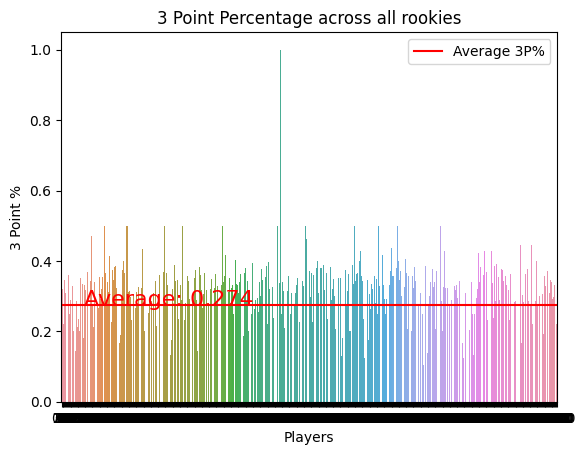

In [97]:
sns.barplot(data=train_df, x="Rank", y="3P%")

three_average = train_df["3P%"].mean()
plt.axhline(y= three_average, color='r', label='Average 3P%')
plt.annotate(f'Average: {three_average:.3f}', xy=(25,three_average), color='r', fontsize=16)

plt.title("3 Point Percentage across all rookies")
plt.xlabel("Players")
plt.ylabel("3 Point %")
plt.legend()
plt.show()

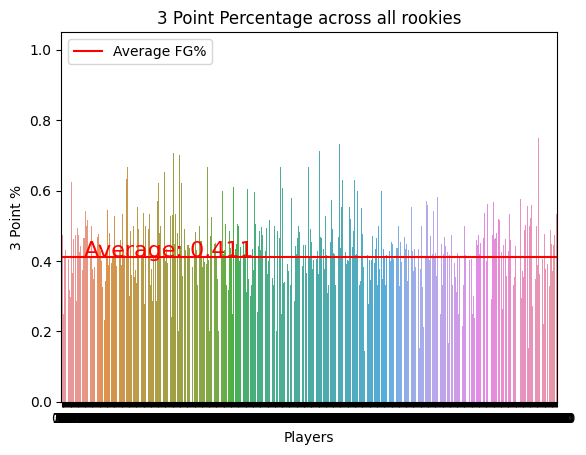

In [98]:
sns.barplot(data=train_df, x="Rank", y="FG%")

fg_average = train_df["FG%"].mean()
plt.axhline(y= fg_average, color='r', label='Average FG%')
plt.annotate(f'Average: {fg_average:.3f}', xy=(25,fg_average), color='r', fontsize=16)

plt.title("3 Point Percentage across all rookies")
plt.xlabel("Players")
plt.ylabel("3 Point %")
plt.legend()
plt.show()

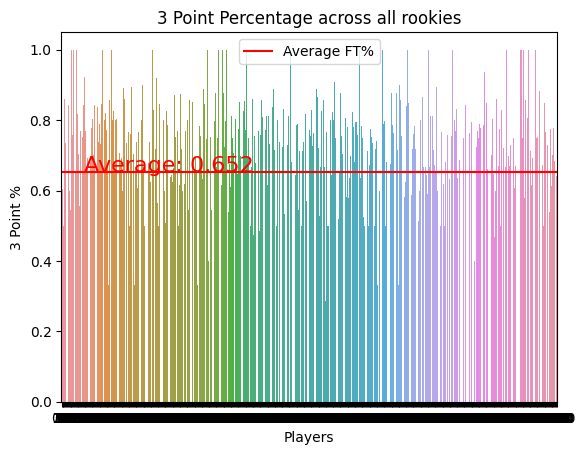

In [99]:
sns.barplot(data=train_df, x="Rank", y="FT%")

ft_average = train_df["FT%"].mean()
plt.axhline(y= ft_average, color='r', label='Average FT%')
plt.annotate(f'Average: {ft_average:.3f}', xy=(25,ft_average), color='r', fontsize=16)

plt.title("3 Point Percentage across all rookies")
plt.xlabel("Players")
plt.ylabel("3 Point %")
plt.legend()
plt.show()

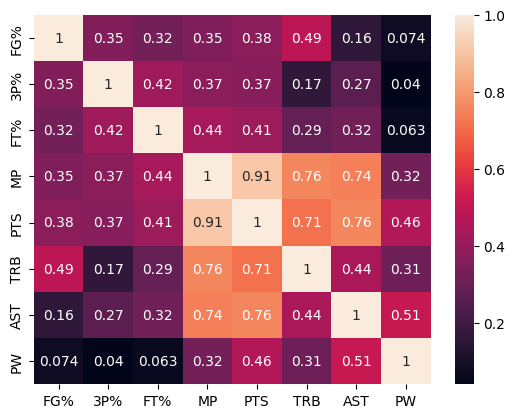

In [100]:
train_df = train_df[['FG%','3P%','FT%','MP','PTS','TRB','AST','PW']]
sns.heatmap(df.corr(), annot=True)
plt.show()

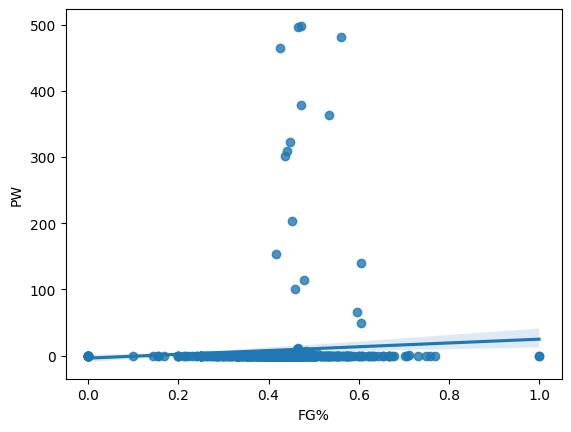

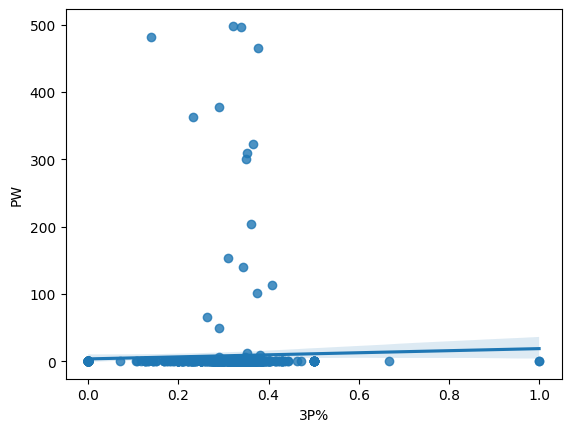

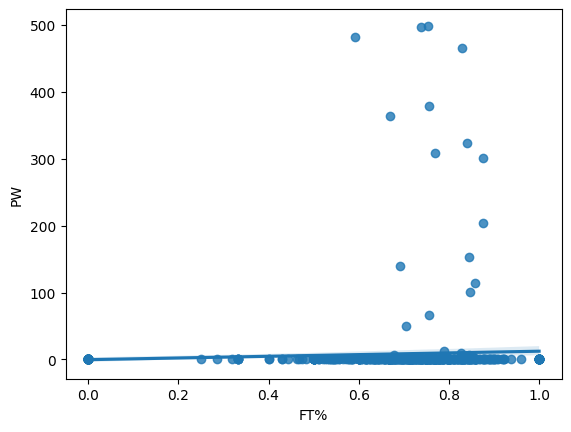

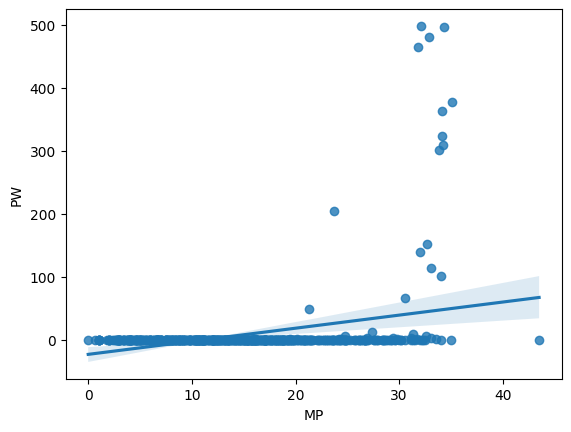

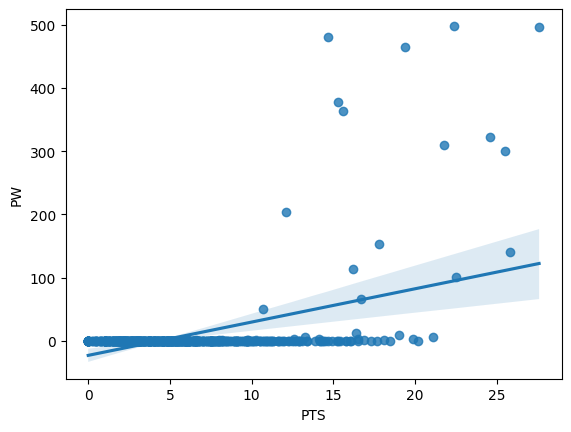

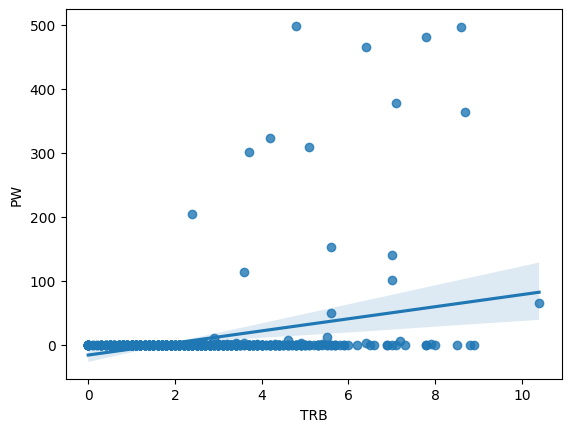

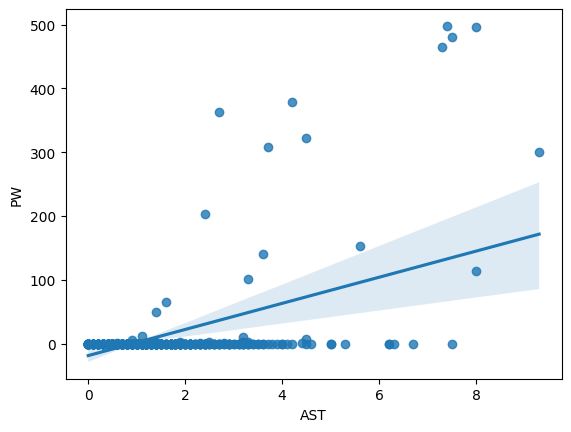

In [101]:
for i in train_df:
    if i != 'PW':
        sns.regplot(x=train_df[i], y=train_df['PW'])
        plt.show()

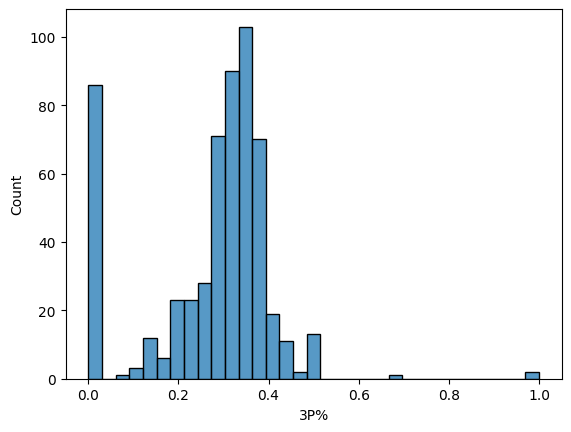

In [102]:
sns.histplot(train_df["3P%"])
plt.show()

In [105]:
train_X = train_df[['FG%','3P%','FT%','MP','PTS','TRB','AST']]
train_y = train_df['PW']
test_df = pd.read_csv('test.csv')
test_df.rename(columns={'ï»¿Rk':'Rank', 'G':'GP'}, inplace=True)

test_df.head()

,Rk,Player,Debut,Age,Yrs,GP,FG%,3P%,FT%,MP,PTS,TRB,AST,PW
0,1.0,Ochai Agbaji,"Oct 19, '22, UTA vs. DEN",22.0,1.0,59.0,0.427,0.355,0.812,20.5,7.9,2.1,1.1,NaN
1,2.0,Patrick Baldwin Jr.,"Oct 30, '22, GSW @ DET",20.0,1.0,31.0,0.394,0.381,0.667,7.3,3.9,1.3,0.4,NaN
2,3.0,Paolo Banchero,"Oct 19, '22, ORL @ DET",20.0,1.0,72.0,0.427,0.298,0.738,33.8,20.0,6.9,3.7,NaN
3,4.0,Dominick Barlow,"Nov 2, '22, SAS vs. TOR",19.0,1.0,28.0,0.535,0.000,0.720,14.6,3.9,3.6,0.9,NaN
4,5.0,MarJon Beauchamp,"Oct 22, '22, MIL vs. HOU",22.0,1.0,52.0,0.395,0.331,0.730,13.5,5.1,2.2,0.7,NaN
